In [156]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import pandas as pd

import matplotlib.pyplot as plt

In [157]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [158]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [159]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
June_temperatures=session.query(Measurement.tobs).filter(extract('month',Measurement.date)==6).all()


In [160]:
#  3. Convert the June temperatures to a list.
June_temperatures=list(np.ravel(June_temperatures))

In [161]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_temperatures_df=pd.DataFrame(June_temperatures,columns=['June Temps'])

In [162]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_temperatures_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [163]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
Dec_temperatures=session.query(Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

In [164]:
# 7. Convert the December temperatures to a list.
Dec_temperatures=list(np.ravel(Dec_temperatures))

In [165]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_temperatures_df=pd.DataFrame(Dec_temperatures,columns=['December Temps'])

In [166]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_temperatures_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [167]:
## Additional Queries

In [168]:
##Write a query that filters the Measurement table to retrieve the precipitation for the month of June and December
June_precipitation=session.query(Measurement.prcp).filter(extract('month',Measurement.date)==6).all()
December_precipitation=session.query(Measurement.prcp).filter(extract('month',Measurement.date)==12).all()

In [169]:
## convert to list
June_precipitation=list(np.ravel(June_precipitation))
December_precipitation=list(np.ravel(December_precipitation))

In [170]:
## create a dataframe
June_precipitation_df=pd.DataFrame(June_precipitation,columns=['June Prcp'])
December_precipitation_df=pd.DataFrame(December_precipitation,columns=['December Prcp'])

In [171]:
## print summary statistic for month June
June_precipitation_df.describe()

,June Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [173]:
## print summary statistic for month Dec
December_precipitation_df.describe()

,December Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [174]:
## add all year precipitation for year 2015 and 2016
year_2016_precipitation=session.query(Measurement.date,Measurement.prcp).filter(extract('year',Measurement.date)==2016).all()
year_2015_precipitation=session.query(Measurement.date,Measurement.prcp).filter(extract('year',Measurement.date)==2015).all()

In [175]:
year_2016_precipitation=pd.DataFrame(year_2016_precipitation,columns=['Date','Prcp'])
year_2015_precipitation=pd.DataFrame(year_2015_precipitation,columns=['Date','Prcp'])
year_2016_precipitation.set_index(year_2016_precipitation['Date'], inplace=True)
year_2016_precipitation = year_2016_precipitation.sort_index()
year_2015_precipitation.set_index(year_2015_precipitation['Date'], inplace=True)
year_2015_precipitation = year_2015_precipitation.sort_index()


In [176]:
year_2015_precipitation

,Date,Prcp
Date,,
2015-01-01,2015-01-01,0.00
2015-01-01,2015-01-01,0.00
2015-01-01,2015-01-01,0.00
2015-01-01,2015-01-01,0.00
2015-01-01,2015-01-01,0.00
...,...,...
2015-12-31,2015-12-31,NaN
2015-12-31,2015-12-31,0.09
2015-12-31,2015-12-31,0.06


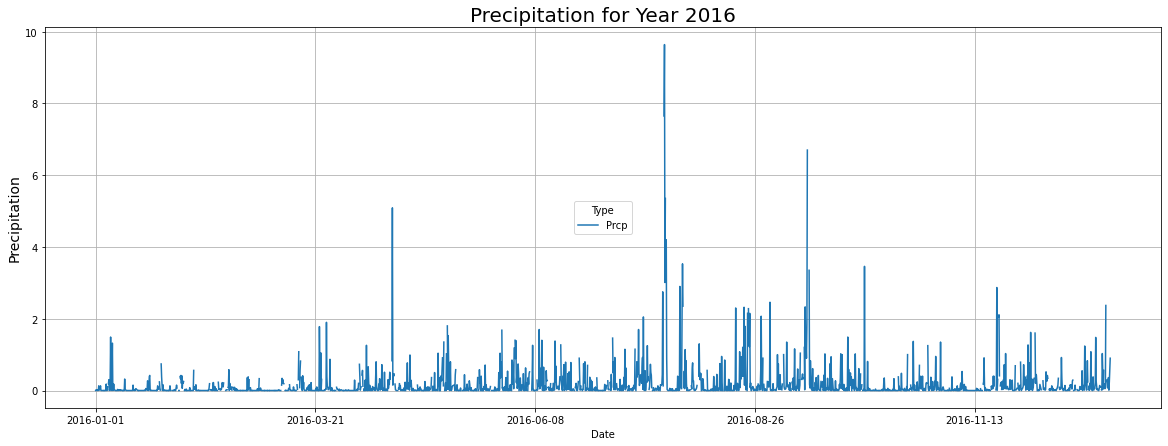

In [185]:
year_2016_precipitation.plot(figsize=(20, 7))
plt.ylabel("Precipitation",fontsize=14)
plt.xlabel("Date")
plt.title("Precipitation for Year 2016", fontsize=20)
plt.legend(loc='center',title='Type')
plt.grid()
plt.savefig("Resources/Prcp_year_2016.png")

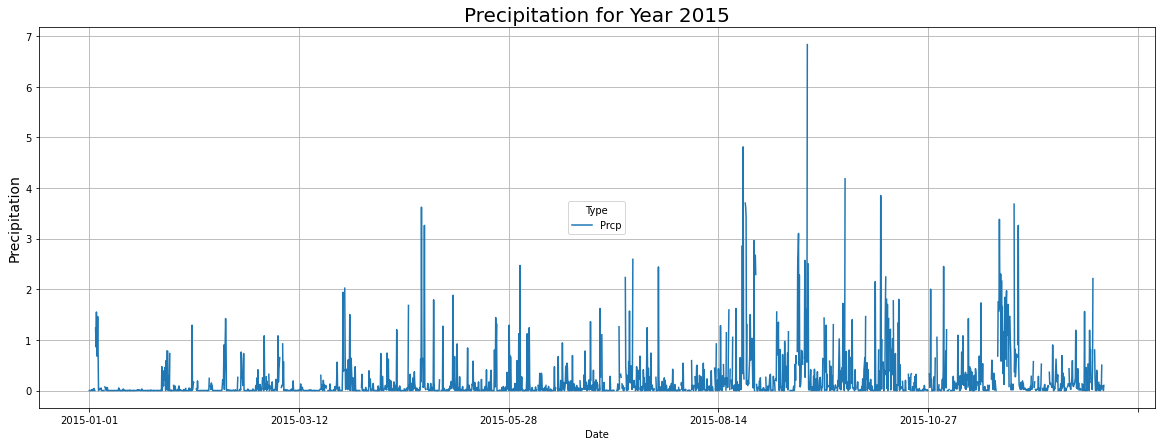

In [186]:
year_2015_precipitation.plot(figsize=(20,7))
plt.ylabel("Precipitation",fontsize=14)
plt.xlabel("Date")
plt.title("Precipitation for Year 2015", fontsize=20)
plt.legend(loc='center',title='Type')
plt.grid()
plt.savefig("Resources/Prcp_year_2015.png")